# Algorithms for AI/ML
**Marc Buffat** dpt mécanique, université Lyon 1

![Algorithme d'IA](images/schemaIA.png)

In [2]:
%matplotlib inline
import sys
import numpy as np
import matplotlib.pyplot as plt
# police des titres
plt.rc('font', family='serif', size='18')
from IPython.display import display,Markdown
import sklearn as sk
#sys.path.insert(1,"/home/cours/DatabaseIA")
from datasetIA import *

## Problematic of the machine learning

**objective** : prediction of the function $\mathcal{F}$ s.t.

$$ Y = \mathcal{F}(\textbf{X}) $$

using a learning data set  $\textbf{X}_i, Y_i$

$\rightarrow$ **Minimization problem**

Find the best approximation  $\mathbf{F}$ that minimizes the error $J$ over the learning data set. 



$J$ is a cost function, for example:

$$ J = \sum_i \alpha_i || \mathbf{F}(\mathbf{X}_i) - Y_i ||^2 $$

- $\mathbf{F}(\mathbf{X}_i)$ is a function of a linear combination of the data $X_i$

 $$\mathbf{F}(\mathbf{X}_i) = \mathbf{F}\left(\sum_j \beta_j \mathbf{X}_{i,j}\right)$$
 
- there is no explicit form for $\mathbf{F}$ that depends of a large number of parameters to be determined by a minimization method

**Implicit Algorithm** that needs an annotated data-set for the learning and the validation phase (supervised machine learning)


### Application domains of machine learning

 - Data base Processing (experimental or numerics)
 - Modelization
 - Big Data
 
**ATTENTION**
 
 - it's not the solution for all problems
 - classical methods / semi-analytical
 - to be used wisely

## Basic Algorithms

**Regression**: logistic (classification) or linear (prediction)

![LogisticvsLinear-regression](images/LogisticvsLinear-regression.png)

### Linear Regression

**Linear regression by least squares** 

The Linear Regression fits a linear model 

$$ \mathbf{y} = w_0 + \mathbf{w}\mathbf{X} $$

with the coefficients:

$$\mathbf{w} = (w_1, \ldots, w_p)$$

to minimize the residual sum of squares between the observed targets in the dataset and the targets predicted by the linear approximation (least squares method).

$$ Min \frac{1}{n} \sum_{i=1}^n (w_0 + \sum_{k=1}^p w_k x_{k,i} - y_i)^2 $$

**scikit learn model**: `LinearRegression` 

In [3]:
from sklearn.linear_model import LinearRegression

N = 11
X,y = dataset1(N)
reg = LinearRegression().fit(X, y)
print("score = {:2d}%".format(int(100*reg.score(X, y))))
print("loi lineaire y = {:.2f} +  {} X".format(reg.intercept_,reg.coef_))

score = 91%
loi lineaire y = 4.08 +  [0.9950683  1.98990227] X


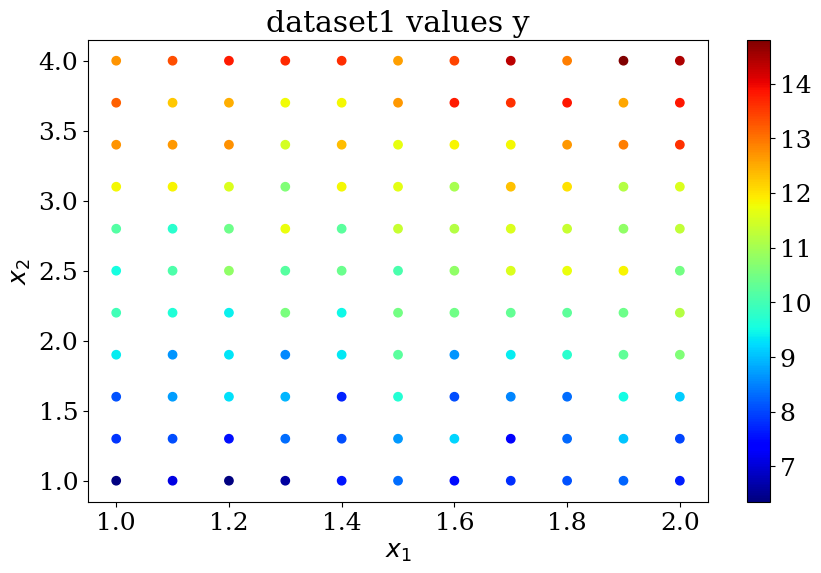

In [4]:
plot_data1(X,y,"dataset1 values y")

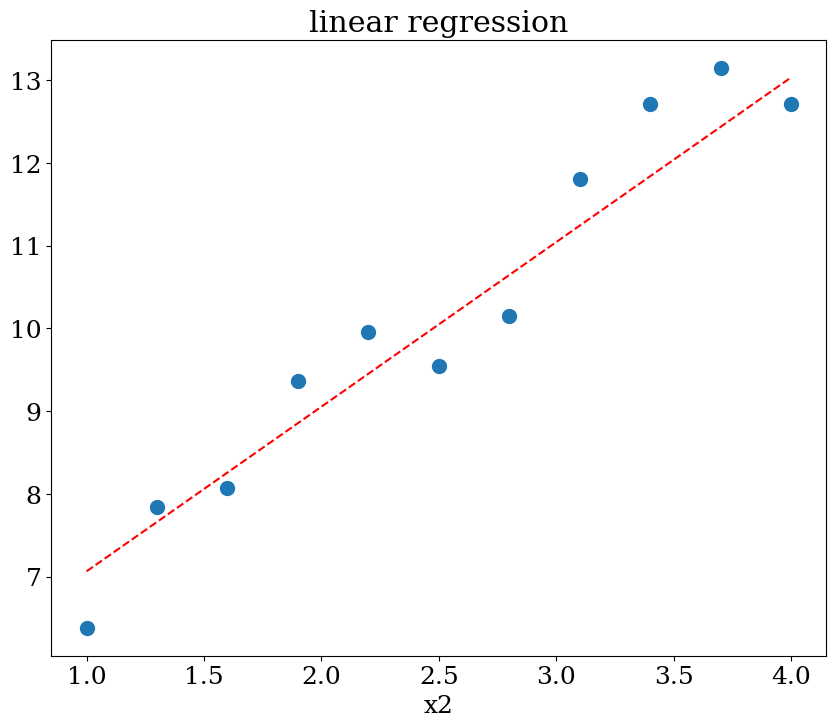

In [6]:
# prediction en x2=1
Xpred  = np.array([[1,x] for x in np.linspace(1,4,21) ])
ypred  = reg.predict(Xpred)
plot1(N,X,y,Xpred,ypred,titre="linear regression")

### Logistic Regression

Logistic regression, despite its name, is a linear classification model rather than a regression model. Logistic regression is also known in the literature as logic regression, maximum entropy classification (MaxEnt), or log-linear classifier. In this model, the probabilities describing the possible outcomes of a single trial are modeled using a logistic function.

Logistic regression is a simple and efficient classification algorithm that does not require significant computational power and is easy to implement. This learning model is widely used by data analysts and scientists.

**scikit learn model**:    `LogisticRegression`

Logistic regression is implemented in **LogisticRegression**. This implementation can fit binary logistic regression, One-vs-Rest, or multinomial logistic regression with optional regularization (l1, l2, elastic net, none)

**Logistic regression algorithm**

Logistic regression is a statistical method for predicting binary classes. The outcome or target variable is dichotomous in nature, meaning there are only two possible classes. It calculates the probability of an event occurring.

It is a special case of linear regression where the target variable is categorical. It uses a log of odds as the dependent variable. Logistic regression predicts the probability of occurrence of a binary event using a logit function:

$$ logit(p) = \ln \frac{p}{1-p} \mbox{ for } p\in]0,1[ $$


**linear regression equation**

$$ z = \beta_0 +  \beta_1 X_1 + ... + \beta_n X_n $$

**sigmoid function**
$$ p = \frac{1}{1+e^{-z}} $$

**Probability y=1**
$$  p = \frac{1}{1+e^{-(\beta_0 +  \beta_1 X_1 + ... + \beta_n X_n)}}$$ 

**Limit**

Logistic regression is not suitable for a large number of applications. This algorithm cannot solve the problem of non-linearity, which requires the transformation of non-linear features.

Thus, logistic regression does not work well with independent variables that are not correlated with the target variable and are very similar to each other.


In [7]:
from sklearn.linear_model import LogisticRegression

N = 10
X,y,col = dataset2(N)
clf = LogisticRegression(random_state=0).fit(X, y)
print("score = {:2d}%".format(int(100*clf.score(X, y))))

score = 98%


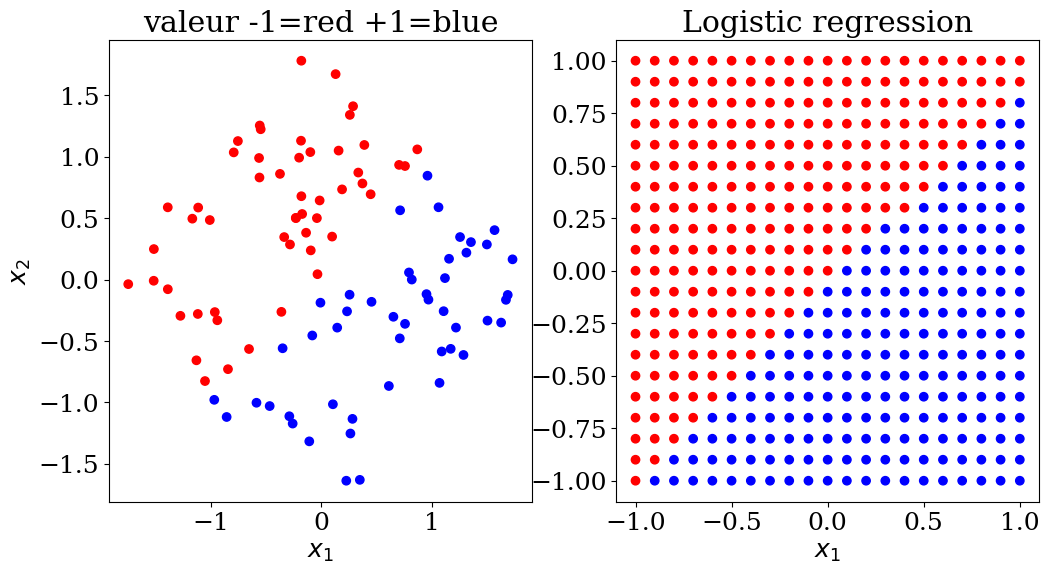

In [9]:
# prediction
NN = 21
Xpred, ypred, colpred = predict2(NN,clf.predict)
plot2(X,col, Xpred,colpred, titre="Logistic regression")

### Decision Trees

To make a prediction, decision trees use a set of "If Then Else" decision rules on the features (data). This method allows the decomposition of a dataset into increasingly smaller subsets. The final subsets can then be assigned a class (0 or 1 for binary classification). The goal of the model is to create homogeneous subsets (containing examples of the same class) to minimize the error of its predictions.

**classification**

 - **scikit learn model**    `DecisionTreeClassifier`
    
**regression**

 - **scikit learn model**    `DecisionTreeRegressor`

**Problem:** The result depends on the order of the questions !

![arbre décisionnel](images/arbres_decis.png)

#### Decision tree: classification

**scikit learn** `DecisionTreeClassifier`

In [10]:
from sklearn.tree import DecisionTreeClassifier

N = 10
X,y,col = dataset2(N)
clf = DecisionTreeClassifier()
clf = clf.fit(X, y)
print("score = {:2d}%".format(int(100*clf.score(X, y))))

score = 100%


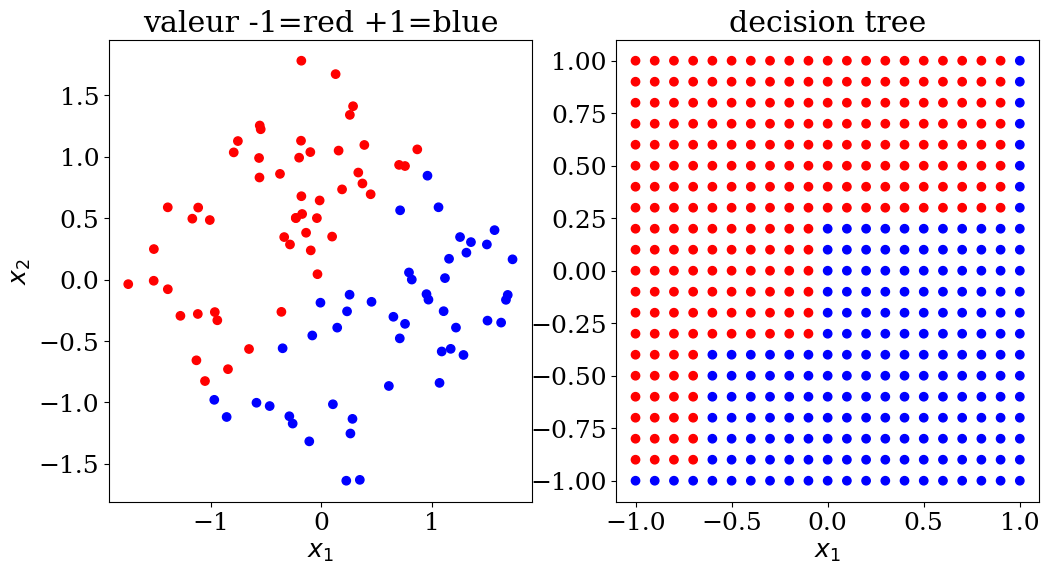

In [11]:
# prediction
NN = 21
Xpred, ypred, colpred = predict2(NN, clf.predict)
plot2(X,col, Xpred,colpred,titre="decision tree")

#### Décision tree: régression

**scikit learn** `DecisionTreeRegressor`

In [ ]:
from sklearn.tree import DecisionTreeRegressor

N = 11
X,y = dataset1(N)
clf = DecisionTreeRegressor()
clf = clf.fit(X, y)
print("score = {:2d}%".format(int(100*clf.score(X, y))))

In [ ]:
# prediction en x2=1
NN = 51
Xpred  = np.array([[1,x] for x in np.linspace(1,4,21) ])
ypred  = clf.predict(Xpred)
plot1(N,X,y, Xpred,ypred,titre="decision tree")

### Random forest algorithm

Random Forest models consist of multiple Decision Trees (a "forest" of decision trees). The result returned by a Random Forest is the majority class output by the individual Decision Trees that compose it. Each of these Decision Trees is trained with a random sample of the training data and a random subset of the features.

![random forest](images/Random-forest.png)

#### Random forest classification
 
**scikit learn** `RandomForestClassifier`
 
  - use of a data-set dataset3 with 3 sets of values (-1,0,+1)
  - influence of the  parameters:
     - max_depth (of the tree) 2, 3 or None

In [12]:
from sklearn.ensemble import RandomForestClassifier

N=15
X,y,col = dataset3(N)
clf = RandomForestClassifier(max_depth=None, random_state=0)
cfl = clf.fit(X, y)
print("score = {:2d}%".format(int(100*clf.score(X, y))))

score = 100%


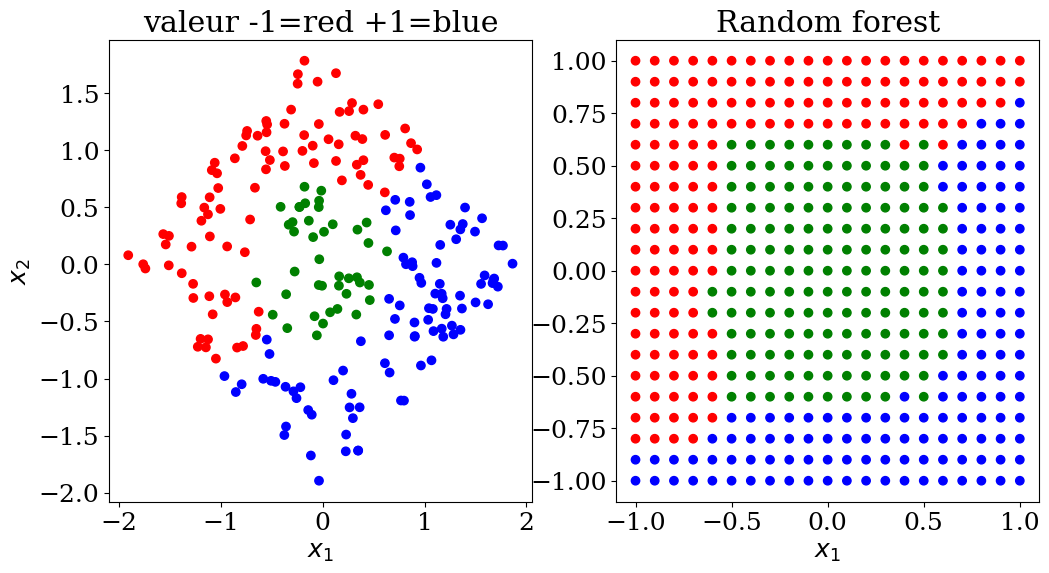

In [13]:
# prediction
NN = 21
Xpred,ypred,colpred = predict3(NN, clf.predict)
plot3(X,col, Xpred,colpred, titre="Random forest")

#### Random forest régression

**scikit learn**  `RandomForestRegression`
   
  - influence of the parameters:  
     - max_depth (of the trees)  2, 3 ou None

In [14]:
from sklearn.ensemble import RandomForestRegressor

N=11
X,y = dataset1(N)
clf = RandomForestRegressor(max_depth=None, random_state=0)
cfl = clf.fit(X, y)
print("score = {:2d}%".format(int(100*clf.score(X, y))))

score = 98%


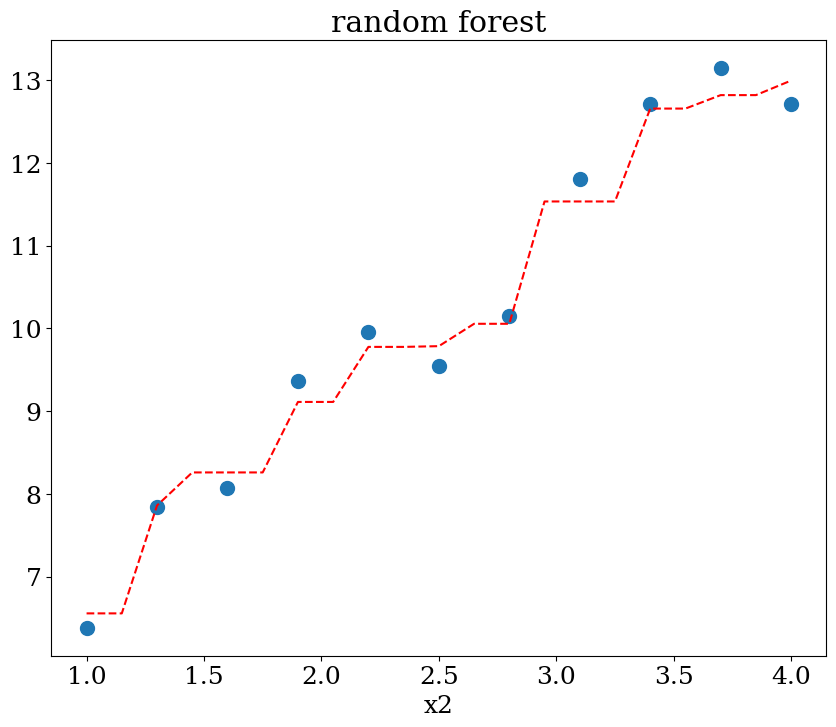

In [15]:
NN = 51
Xpred  = np.array([[1,x] for x in np.linspace(1,4,21) ])
ypred  = clf.predict(Xpred)
plot1(N,X,y, Xpred,ypred,titre="random forest")

### K Nearest Neighbors (KNN)

KNN (K-Nearest Neighbors) is a classification algorithm where the class of a data point is determined based on the classes of its K nearest neighbors. The algorithm works by finding the K closest data points to the target point and assigning the most common class among these neighbors to the target point. It’s a simple, instance-based learning method that does not require explicit training but relies on the distance metric to make predictions.

The KNN algorithm assigns a class to an example based on the majority class among its K nearest neighbors. K is a parameter that needs to be optimized by the user; it is generally preferable to choose an odd value for K in binary classification to avoid ties. The Euclidean distance between two feature vectors is commonly used to calculate the proximity between two examples.

![KNN](images/knn.png)

#### KNN classification

**scikit learn** `KNeighborsClassifier`
    
**parameters:**
  
  - n_neighbors  = 2,3,..5

In [16]:
from sklearn.neighbors import KNeighborsClassifier

N = 20
X,y,col = dataset3(N)
neigh = KNeighborsClassifier(n_neighbors=5)
neigh = neigh.fit(X, y)
print("score = {:2d}%".format(int(100*neigh.score(X, y))))

score = 98%


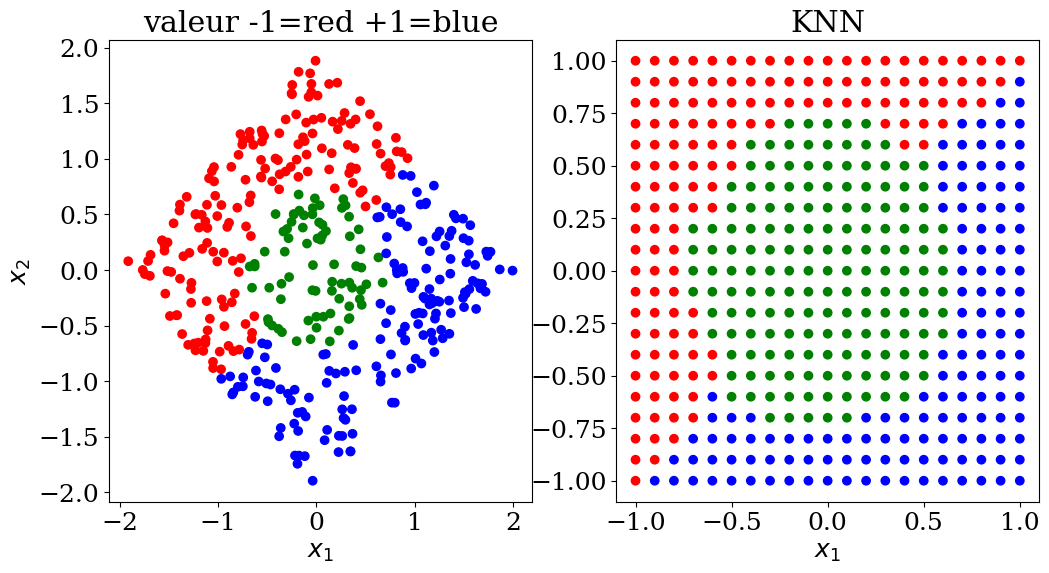

In [17]:
# prediction
NN = 21
Xpred,ypred,colpred = predict3(NN, neigh.predict)
plot3(X,col, Xpred,colpred, titre="KNN")

#### KNN regression

**scikit learn** `KNeighborsRegressor`
    
**parameters:**
  
  - n_neighbors  = 2,3,..5

In [18]:
from sklearn.neighbors import KNeighborsRegressor

N=11
X,y = dataset1(N)
neigh = KNeighborsRegressor(n_neighbors=5)
neigh = neigh.fit(X, y)
print("score = {:2d}%".format(int(100*neigh.score(X, y))))

score = 93%


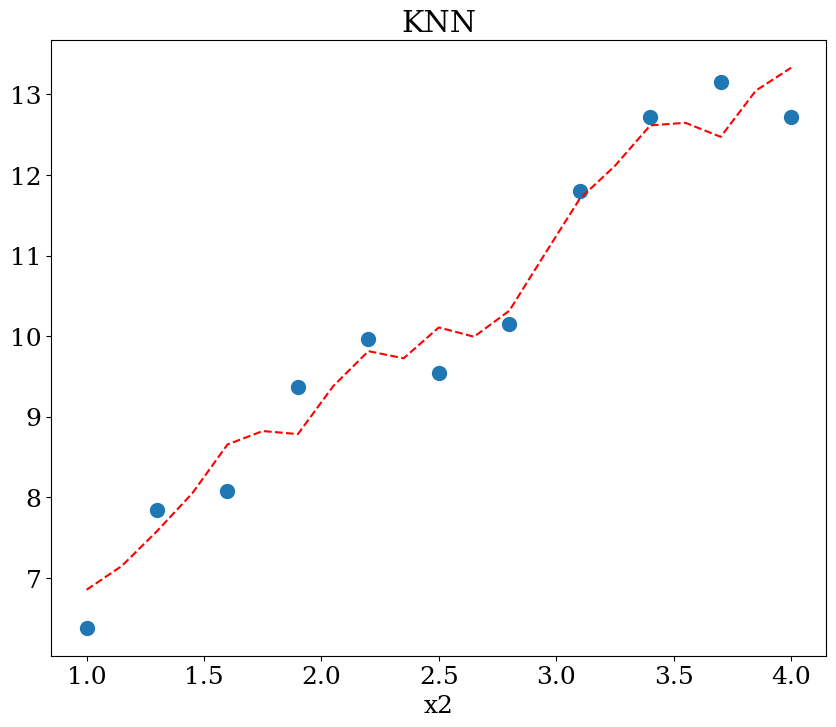

In [19]:
NN = 51
Xpred  = np.array([[1,x] for x in np.linspace(1,4,21) ])
ypred  = neigh.predict(Xpred)
plot1(N,X,y, Xpred,ypred,titre="KNN")

### Support vector machine SVM

**scikit learn**  `svm`

Support Vector Machines (SVM) are a set of supervised learning algorithms used for classification and regression tasks. The core idea of SVM is to find the optimal hyperplane that best separates different classes in the feature space.

Here's a brief overview of how SVM works:

- **Linear Classification**: For linearly separable data, SVM finds the hyperplane (a line in 2D, a plane in 3D, or a hyperplane in higher dimensions) that maximizes the margin between the two classes. The margin is the distance between the hyperplane and the nearest data points from either class, known as support vectors.

- **Kernel Trick**: For non-linearly separable data, SVM can use a kernel function to transform the feature space into a higher dimension where a linear separation is possible. Common kernels include polynomial, radial basis function (RBF), and sigmoid.

- **Regularization**: SVM includes a regularization parameter (C) that balances the trade-off between maximizing the margin and minimizing classification errors. A high C value aims for a smaller margin and fewer classification errors, while a low C value allows for a larger margin but may result in more misclassifications.

- **Support Vectors**: These are the data points that lie closest to the decision boundary. They are crucial in defining the hyperplane and are the only points needed to construct the model.

SVM is known for its effectiveness in high-dimensional spaces and its flexibility due to the kernel trick. However, it can be computationally intensive for very large datasets.

![SVM](images/SVM-margin.jpg)

In [20]:
from sklearn import svm

N = 20
X,y,col = dataset3(N)
clf = svm.SVC()
clf = clf.fit(X,y)
print("score = {:2d}%".format(int(100*clf.score(X, y))))

score = 99%


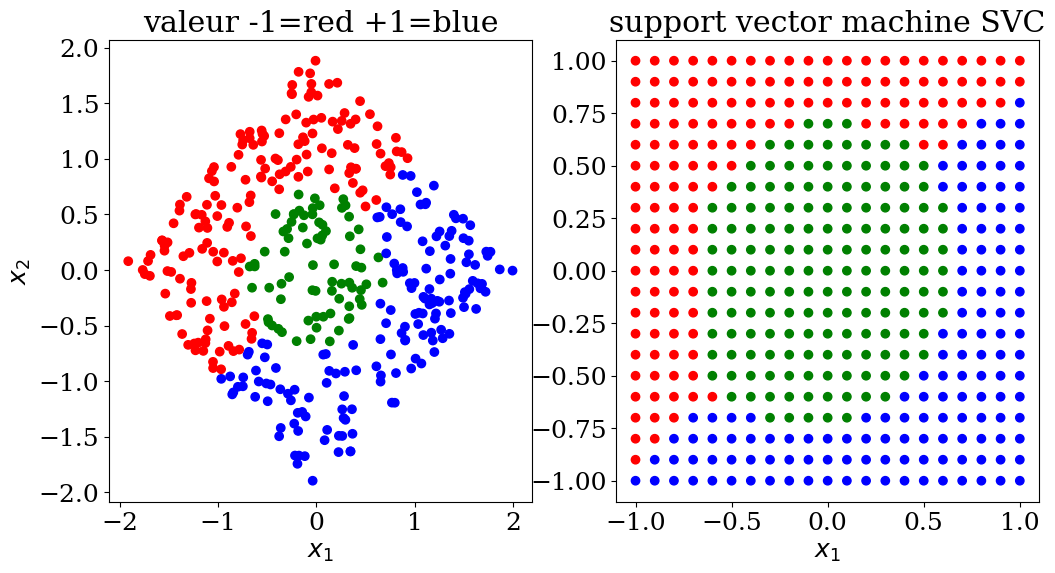

In [21]:
# prediction
NN = 21
Xpred, ypred, colpred = predict3(NN, clf.predict)
plot3(X,col, Xpred,colpred, titre="support vector machine SVC")

## Neural Networks in artificial intellignece (AI)

Neural networks in artificial intelligence (AI) are computational models inspired by the functioning of the human brain, designed to recognize patterns and learn complex relationships between data. Here is an overview of their main concepts and types:

**Basic Concepts**

- **Neuron**: The basic unit of a neural network, similar to a nerve cell in the brain. Each neuron receives inputs, performs a computation, and produces an output.

- **Layer**: A neural network consists of several layers:
  - Input Layer: Receives raw data.
  - Hidden Layers: Perform intermediate transformations of the data. A network can have multiple hidden layers, making it "deep" in the case of deep neural networks.
  - Output Layer: Provides the final prediction or classification.

- **Activation Function**: Determines whether a neuron should be activated by applying a non-linear transformation to the data. Common functions include sigmoid, hyperbolic tangent (tanh), and ReLU (Rectified Linear Unit).

- **Forward Propagation**: The process by which data passes through the layers of the network, from input to output, to produce a prediction.

- **Backpropagation**: The algorithm used to train the network by adjusting the weights of the connections based on the error between the prediction and the actual value, minimized by a loss function.

- 
![reseaux neuronnes](images/reseaux_neurones.png)

### Deep Learning 
misleading analogy between neural networks and the human brain

**Neural Networks vs. the Human Brain:**

Imagine a neural network as a simplified version of the human brain. In this analogy:

- **Neurons**: In a neural network, the artificial neurons are like the neurons in your brain. Both process information and make decisions based on inputs. However, unlike the intricate, highly connected neurons in the brain, artificial neurons in a network are more straightforward and mathematical.

- **Layers**: Neural networks have layers of neurons, similar to how the brain has different layers and regions responsible for various functions. While both have layers, neural network layers are highly structured and organized, whereas the brain's layers are far more complex and involve rich biological processes.

- **Activation Functions**: Just as neurons in the brain fire in response to certain stimuli, artificial neurons in a neural network use activation functions to decide whether to activate based on input. In reality, brain neuron firing is influenced by a range of complex biochemical processes.

- **Learning**: Neural networks learn by adjusting weights based on errors, akin to how the brain adjusts connections between neurons based on experience. In the brain, learning involves complex processes like neuroplasticity and involves the strengthening or weakening of synaptic connections.

- **Backpropagation**: Neural networks use backpropagation to update weights based on errors, which is a mathematical method for learning. The brain’s learning process, while similar in that it adjusts connections, involves biochemical changes and intricate neural communication that isn't captured by simple algorithms.

- **Data Processing**: Neural networks process data in a structured manner with a clear path from input to output. The brain, however, processes information in a highly interconnected and dynamic way, integrating sensory inputs, emotions, and past experiences in a far more complex system.

In summary, while there are parallels between neural networks and the human brain, such as information processing and learning, the analogy is imperfect. Neural networks are mathematical models with simplified and structured components, while the brain is a complex biological system with intricate and multi-dimensional processes.

![image Dl](./images/DL.png)


## Neuron (informatique)

![image neurone](images/neurone.png)

* $f$ is an activation function
* **Question** : which activation function $f$  should be chosen to obtain the linear model ?


### Classical Activation Functions 

![sigmoide](images/sigmoid_relu.png)


- **left sigmoid** : To be placed at the end of a network to predict a probability (between 0 and 1)
- **right relu** : Between each layer to introduce non-linearity (at a low computational cost)



### Formal Neuron

The formal neuron is a model characterized by input signals $\mathbf{x}=[x_1,...,x_p]$ and an activation function $f$ to compute the output $y$.

$$ y = f(\alpha_0 + \sum_{i=1}^p \alpha_i x_j) = f(\alpha_0 + \alpha \mathbf{x}) $$

The activation function performs a transformation of an affine combination of the input signals, where $\alpha_0$, the constant term, is called the neuron's bias. This affine combination is determined by a weight vector $\mathbf{\alpha}=[\alpha_1,..\alpha_2]$ associated with each neuron, and its values are estimated during the learning phase. These weights constitute the distributed memory or knowledge of the network.



#### Simple perceptron model

The Perceptron model is a fundamental algorithm in machine learning and neural networks used for binary classification. It was introduced by Frank Rosenblatt in 1957. Here’s an overview of the Perceptron model:

**Key Concepts**

1. **Structure**:
   - **Inputs**: The Perceptron receives input signals $\mathbf{x} = [x_1, x_2, \ldots, x_p]$.
   - **Weights**: Each input is associated with a weight $\mathbf{w} = [w_1, w_2, \ldots, w_p]$, which adjusts the importance of each input.
   - **Bias**: The bias term $\alpha_0$ helps adjust the decision boundary.

2. **Affine Combination**:
   - The Perceptron computes a weighted sum of the inputs plus the bias:
     
     $$ z = \mathbf{w} \cdot \mathbf{x} + \alpha_0 = w_1x_1 + w_2x_2 + \cdots + w_p x_p + \alpha_0$$

3. **Activation Function**:
   - The Perceptron uses a step function as its activation function:
     
     $$
     y = \begin{cases} 
     1 & \text{if } z \geq 0 \\
     0 & \text{if } z < 0 
     \end{cases}
     $$
     
   - This function outputs either 1 or 0 based on whether the affine combination \( z \) is above or below a threshold (which is 0 in this case).

4. **Learning Rule**:
   - During the training phase, the Perceptron adjusts the weights and bias based on the errors it makes. The update rules are:

     $$ w_i \leftarrow w_i + \eta \cdot (y_{\text{true}} - y_{\text{pred}}) \cdot x_i$$
     
     $$\alpha_0 \leftarrow \alpha_0 + \eta \cdot (y_{\text{true}} - y_{\text{pred}})$$
     
   - Here, $\eta$ is the learning rate, $y_{\text{true}}$ is the actual label, and $y_{\text{pred}}$ is the predicted label.

5. **Training Process**:
   - The Perceptron is trained using a supervised learning approach where it iteratively updates its weights and bias to minimize classification errors on the training dataset.

6. **Limitations**:
   - The Perceptron can only solve linearly separable problems. It cannot classify data that is not linearly separable (e.g., the XOR (exclusive or) problem).

**Applications**

- The Perceptron serves as a building block for more complex neural network models, particularly in understanding the basics of linear classifiers and learning algorithms.
- It is a foundational concept for further exploration into multi-layer neural networks and other machine learning techniques.

The Perceptron model provides a simple yet powerful introduction to classification algorithms and neural networks, demonstrating the core ideas of linear decision boundaries and iterative learning.

![perceptron simple](images/perceptron_simple.png)

## Neural networks / layers 

![image layers](images/layers.png)


- **left** : depth = 1 
- **right** : depth = 2  



### formalism: Multi Layer Perceptron (MLP)

The Multilayer Perceptron (MLP) is a network composed of successive layers. A layer is a set of neurons that have no connections between themselves. An input layer reads the incoming signals, one neuron per input $x_j$​, and an output layer provides the system's response $Y$.

The pp inputs or explanatory variables of the model are denoted $X_1,...,X_p$, while the output is the target variable $Y$ to be predicted by the model.

Typically, in regression (where $Y$ is quantitative), the final layer consists of a single neuron with an identity activation function, while the other neurons (in the hidden layers) use the sigmoid activation function.

This model includes non-linear "hidden" layers. The term "hidden" simply means that these layers are not directly connected to the inputs or outputs.


#### Perceptron with one hidden layer

In regression with a perceptron that has one hidden layer with $q$ neurons and one output neuron, the function can be expressed as follows:

1. **Hidden Layer Calculation**:
   Each hidden neuron $h_j$ computes a weighted sum of the inputs $\mathbf{x}$ plus a bias, and then applies an activation function (typically sigmoid in this context). For the $j$-th hidden neuron, this can be written as:

   $$ z_j = \mathbf{w}_j \cdot \mathbf{x} + b_j$$
   
   $$ h_j = \sigma(z_j) = \frac{1}{1 + e^{-z_j}}$$
 
   where $\mathbf{w}_j$ is the weight vector for the $j$-th hidden neuron, $b_j$ is the bias term for the $j$-th hidden neuron, and $\sigma$ is the sigmoid activation function.

3. **Output Layer Calculation**:
   The output neuron computes a weighted sum of the hidden layer outputs plus a bias term, and usually applies an identity function (for regression tasks). The final output $\hat{y}$ is given by:

$$ \hat{y} = \mathbf{w}_{\text{out}} \cdot \mathbf{h} + b_{\text{out}}$$

   where $\mathbf{w}_{\text{out}}$ is the weight vector connecting the hidden layer to the output neuron, $\mathbf{h}$ is the vector of outputs from the hidden layer neurons, and $b_{\text{out}}$ is the bias term for the output neuron.

Combining these, the complete function can be written as:

$$\hat{y} = \mathbf{w}_{\text{out}} \cdot \left[ \sigma(\mathbf{w}_1 \cdot \mathbf{x} + b_1), \sigma(\mathbf{w}_2 \cdot \mathbf{x} + b_2), \ldots, \sigma(\mathbf{w}_q \cdot \mathbf{x} + b_q) \right] + b_{\text{out}}$$

Here’s a step-by-step breakdown:

1. Compute the weighted sum of inputs for each hidden neuron.
2. Apply the sigmoid activation function to these sums to get the hidden layer outputs.
3. Compute the weighted sum of these hidden layer outputs and add the output layer bias to get the final prediction.




**theoretical result**

A theorem known as the **Universal Approximation Theorem** demonstrates that this basic structure with a single hidden layer is sufficient to handle classical modeling or statistical learning problems. Specifically, it states that:

"Any continuous function can be uniformly approximated with arbitrary precision, within a finite domain of its input space, by a neural network that has a single hidden layer with a finite number of neurons, all using the same activation function, and a linear output neuron".

This theorem assures that a neural network with one hidden layer is capable of approximating any continuous function to a desired level of accuracy, given enough neurons in the hidden layer. It highlights the powerful capability of neural networks to model complex functions, even with relatively simple network architectures. 

**attention** it does not say how !

### Learning

Suppose we have a training dataset of size  $n$ with observations $(x_i^1, \ldots, x_i^p; y_i)$ of the explanatory variables $X_1, \ldots, X_p$ and the variable to predict $Y$. Consider the simplest case of regression with a network consisting of a single linear output neuron and a hidden layer with $q$ neurons, where the parameters are optimized using least squares. This generalizes to any differentiable loss function and thus to classification with $m$ classes.

Learning involves estimating the parameters $\alpha_{j=0,p;k=1,q}$ and $\beta_{k=0,q}$ by minimizing either the quadratic loss function or the entropy function in classification.

$$ 
Q(\alpha,\beta) = \sum_{i=1}^n Q_i = \sum_{i=1,n}^n [y_i - f(\mathbf{x};\alpha,\beta)]^2
$$


**remarks**

- Different optimization algorithms can be used, and they are typically based on a numerical evaluation of the gradient through back propagation:

$$ [\frac{\partial Q_i}{\partial \beta_k}; \frac{\partial Q_i}{\partial \alpha_{kj}}]$$

**Stochastic Gradient Descent (SGD) Minimization Algorithm**

- **Gradient Estimation**: In Stochastic Gradient Descent, the gradient is estimated either sample by sample or by mini-batches containing a few samples. This means that instead of computing the gradient over the entire dataset (as in Batch Gradient Descent), SGD updates the model parameters based on gradients computed from a subset of the data.

- **Epoch**: A complete pass over the entire training dataset is called an **"Epoch"**. During each epoch, the algorithm processes all training examples once. The number of epochs determines how many times the learning algorithm will iterate over the entire dataset during training.

- **Number of Epochs**: The number of **"Epochs"** is the total count of passes made over the training dataset while learning with SGD. Increasing the number of epochs generally improves the model's performance, as it allows the algorithm to learn more thoroughly from the data. However, after a certain point, additional epochs might lead to overfitting or diminishing returns.

In summary:

- **Gradient estimation** is performed on individual samples or mini-batches.
- An **"Epoch"** represents one complete iteration over the entire training dataset.
- The **number of epochs** refers to how many complete passes over the dataset are performed during training with SGD.


### Type of Layers

- **Dense Layer**: Also known as a fully connected layer, this is a linear model where each neuron is connected to every neuron in the previous layer. It performs a matrix multiplication followed by an optional activation function to produce the output. This layer is used to learn linear relationships between features.

- **Convolutional Layer**: 
  - **Purpose**: Designed to handle spatial dimensions, such as images. This layer applies convolutional filters to local patches of the input to detect patterns like edges, textures, and shapes.
  - **Hypothesis**: Neighboring pixels represent similar information. By focusing on local regions, convolutional layers capture spatial hierarchies in the data.
  - **Convolution Operation**: Involves local connectivity of pixels (neighborhood) to detect larger objects such as lines and curves.

- **Max Pooling Layer**: 
  - **Purpose**: Reduces the spatial dimensions (width and height) of the input, typically after a convolutional layer. This layer performs a down-sampling operation by taking the maximum value from a specific region of the input.
  - **Advantage**: Helps to reduce the number of parameters and computations, and also helps to prevent overfitting by providing a form of translation invariance.

- **Dropout Layer**: 
  - **Purpose**: Regularization technique used to prevent overfitting. During training, randomly selected neurons are ignored (dropped out) with a certain probability.
  - **Advantage**: Helps the model generalize better by preventing reliance on any particular neurons.

- **Recurrent Layer**: 
  - **Purpose**: Designed to handle sequential or temporal data, such as time series or natural language. Recurrent layers maintain a hidden state across time steps, allowing the model to capture dependencies over time.
  - **Types**: Includes Long Short-Term Memory (LSTM) units and Gated Recurrent Units (GRUs), which are specifically designed to handle issues like vanishing and exploding gradients in long sequences.

### Summary

- **Dense Layer**: Linear model connecting every neuron in the previous layer to every neuron in the current layer.
- **Convolutional Layer**: Applies filters to local regions of the input, useful for detecting spatial patterns.
- **Max Pooling Layer**: Reduces spatial dimensions by taking the maximum value from local regions, aiding in computational efficiency and overfitting prevention.
- **Dropout Layer**: Regularization method that randomly drops neurons during training to improve generalization.
- **Recurrent Layer**: Handles sequential data by maintaining a hidden state across time steps, capturing temporal dependencies.

These layers are fundamental components of various types of neural networks, including Convolutional Neural Networks (CNNs) for spatial data and Recurrent Neural Networks (RNNs) for temporal data.


## Convolutional Neural Networks

**Convolution of an image**

- filter 5x5

![image convolution générale](images/convolution.png)




### Type of Convolutional Neural Networks

**objective**: reduction of the data size (image)

$\Rightarrow$ for an image, filter 3x3
    
- Convolution

- Max Pooling (replace several pixels by the max)

- Drop Out (remove pixels)


### Classification Neural network

**scikit learn model**   `MLPClassifier`
     
**MLP** =  Multi-layer Perceptron 

**parameters**:
   
   - hidden_layer_sizes = (taille1, taille2,...) 

If you want a model with 3 layers, each containing 100 neurons, you should specify the model architecture as a tuple where each element represents the number of neurons in each layer. For this case, the tuple would be:

    hidden_layer_sizes = (100,100,100). 

The default value represents a single hidden layer of 100 neurons.


In [24]:
from sklearn.neural_network import MLPClassifier

N = 20
X,y,col = dataset3(N)
clf = MLPClassifier(hidden_layer_sizes=(N**2,N**2,N**2), max_iter=400, random_state=1, verbose = False)
clf = clf.fit(X,y)
print("score = {:2d}%".format(int(100*clf.score(X, y))))

score = 100%


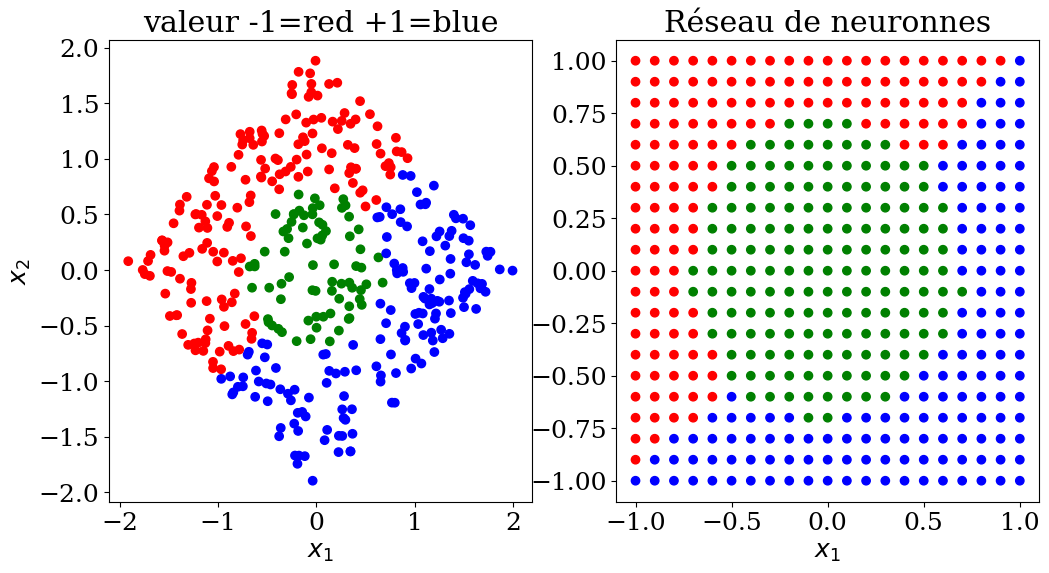

In [25]:
# prediction
NN = 21
Xpred, ypred, colpred = predict3(NN, clf.predict)
plot3(X,col, Xpred,colpred,titre="Réseau de neuronnes")

### Regression Neural network

**scikit learn model**   `MLPRegressor`
     
**MLP** =  Multi-layer Perceptron 

**parameters**:
   
   - hidden_layer_sizes = (number, size)  1,2, .. 5

In [26]:
from sklearn.neural_network import MLPRegressor

N = 11
X,y = dataset1(N)
clf = MLPRegressor(hidden_layer_sizes=(N**2,N**2,N**2), max_iter=400, random_state=1, verbose = False)
clf = clf.fit(X,y)
print("score = {:2d}%".format(int(100*clf.score(X, y))))

score = 43%


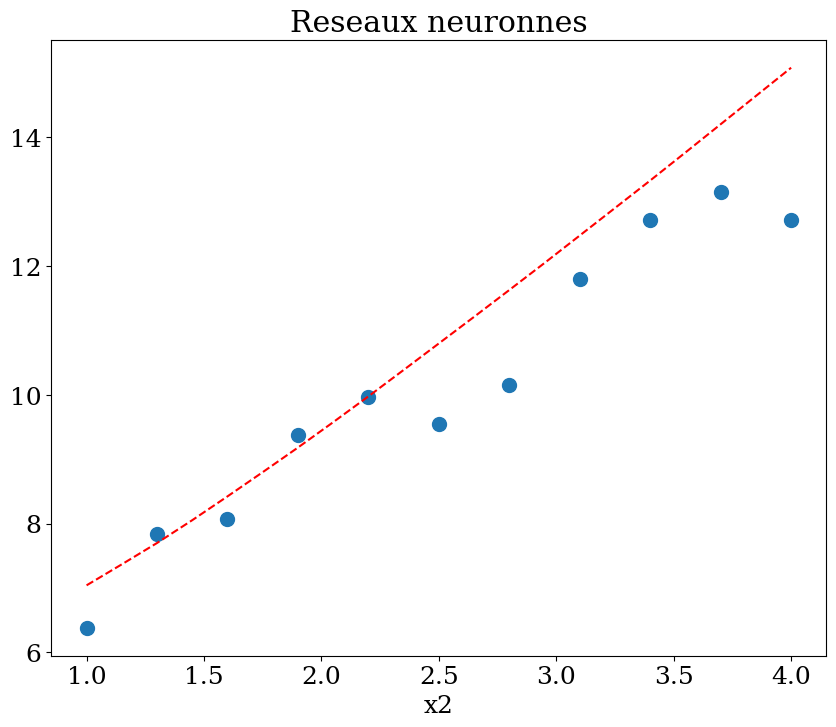

In [27]:
NN = 51
Xpred  = np.array([[1,x] for x in np.linspace(1,4,21) ])
ypred  = clf.predict(Xpred)
plot1(N,X,y, Xpred,ypred,titre="Reseaux neuronnes")

## Learning with times series

1. Classification 

- **Identify** rainy/non-rainy episodes
- **Determine** if a weather station is malfunctioning

2. Regression 

- **Predict** the maximum temperature of the day
- **Predict** the amount of expected rainfall
- **Correct** the measured temperature


**Problem**

* definition of the data $X$ (features) 
* definition of the results $y$ (target)

$\Rightarrow$ machine learning: find the model  $f(X)$  that minimizes $L$

$$ L = \frac{1}{N} \sum_{i=1}^N (y_i - f(X_i))^2 $$

![time series](images/time_series.png)

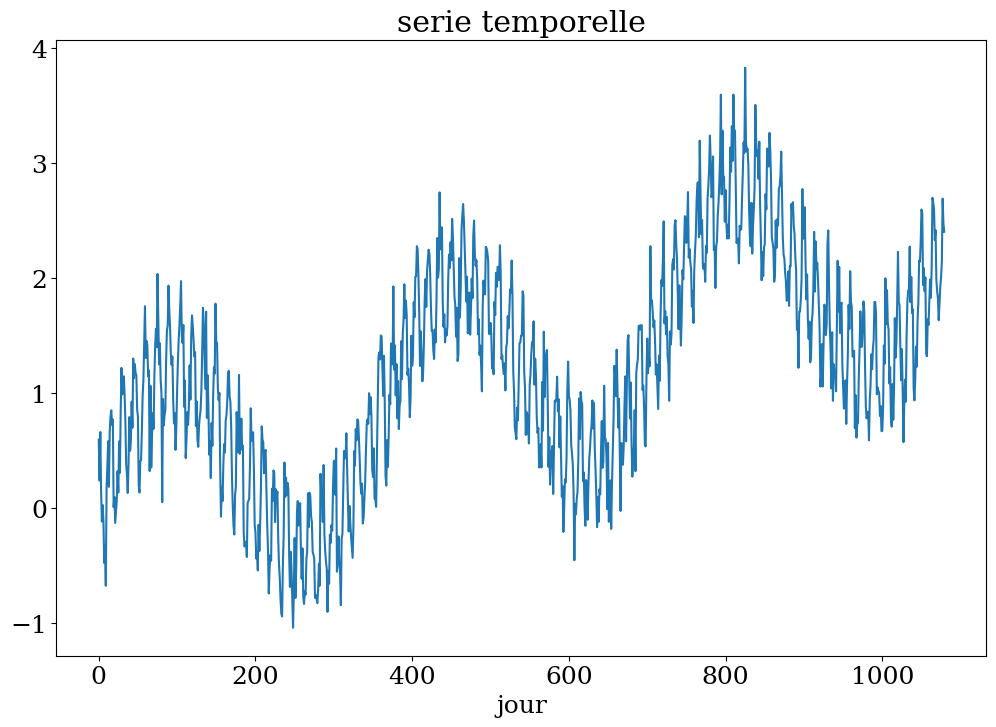

In [28]:
# construction serie
Ts,ys = serie_temp(3)
plt.figure(figsize=(12,8))
plt.plot(Ts[:],ys)
plt.xlabel("jour")
plt.title("serie temporelle");

apprentissage sur une fenetre de 14 jours entre le jour 237 et 300


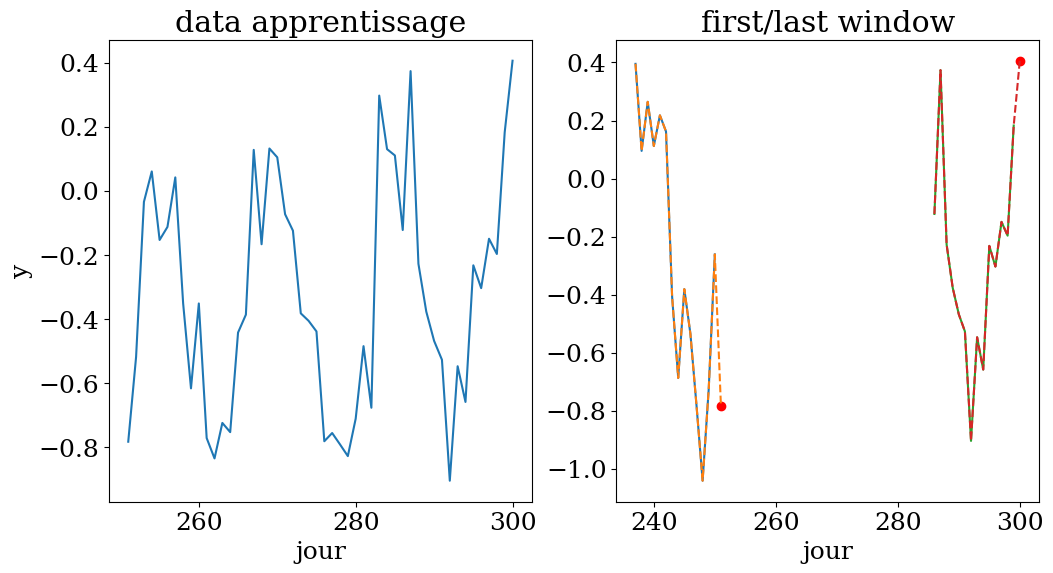

In [29]:
# 50 fenetres de 14 jours pour prediction au jour 300
n = 14
N = 50
t0 = 300
X,y,t = dataset4(Ts,ys,n,N,t0)
plot_data4(n,N,t0,t,X,y,Ts,ys)

In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics   import r2_score
# choix de l'algorithme
clf = RandomForestRegressor()
#clf = KNeighborsRegressor()
#clf = LinearRegression()

clf.fit(X,y)
print("score = {:2d}%".format(int(100*clf.score(X, y))))
yp = clf.predict(X)
print("R2 = {:3.2f}%".format(r2_score(y,yp)))

score = 92%
R2 = 0.92%


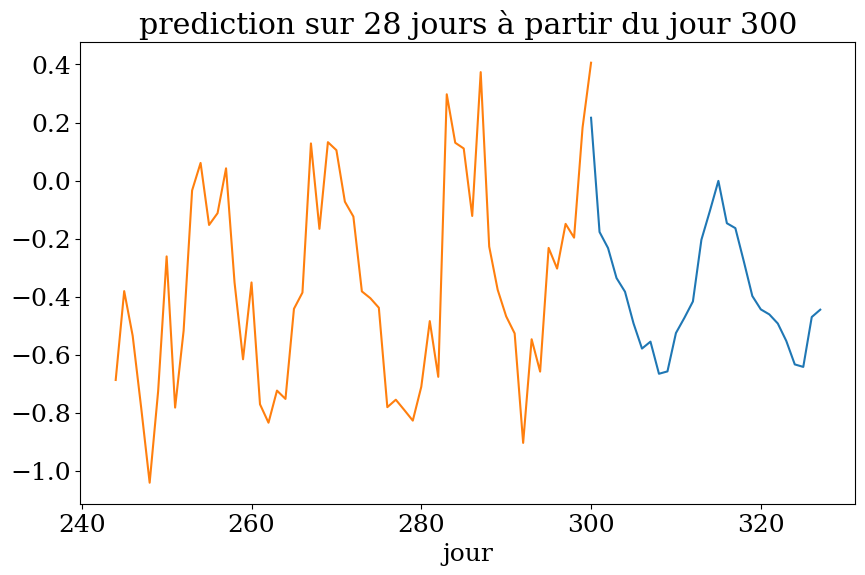

In [31]:
# prediction sur n1 jours
n1 = 2*n
Xpred  = np.zeros((n1,n))
ypred  = np.zeros(n1)
for k in range(n1):
    Xpred[k,:] = ys[t0+k-n:t0+k]
ypred = clf.predict(Xpred)
plot4(n1,t0,Ts,ys,ypred,"prediction")

## Quality of Learning

**Regression Metrics** to quantify the quality of predictions

For a test set (or training set) of size $n$, the discrepancy between the prediction $\hat{y}_i$ and the actual value $y_i$ is evaluated.

- **Mean Squared Error (MSE)**: 

The Mean Squared Error measures the average of the squares of the errors, which are the differences between the predicted values $\hat{y}_i$ and the actual values $y_i$. It is calculated as:

$$\text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (\hat{y}_i - y_i)^2$$

Where:
  - $\hat{y}_i$ is the predicted value for the $i$-th observation.
  - $y_i$ is the actual value for the $i$-th observation.
  - $n$ is the number of observations in the test set.

MSE gives a measure of how well the model's predictions match the actual values, with lower values indicating better performance.


**Coefficient of Determination: $R^2$ Score**

It represents the proportion of the variance in $y$ that has been explained by the independent variables of the model. It provides an indication of the quality of the fit and, consequently, a measure of how well unseen samples are likely to be predicted by the model, through the proportion of the explained variance.

The $R^2$ score is calculated as:

$$R^2 = 1 - \frac{\text{SS}_{\text{res}}}{\text{SS}_{\text{tot}}} =  1 - \frac{\sum_{i=1}^n |y_i - \hat{y_i} |^2}{\sum_{i=1}^n |y_i - \bar{y_i} |^2}$$

Where:
- $\text{SS}_{\text{res}}$ is the sum of squared residuals (errors): $\sum_{i=1}^{n} (\hat{y}_i - y_i)^2$
- $\text{SS}_{\text{tot}}$ is the total sum of squares: $\sum_{i=1}^{n} (y_i - \bar{y})^2$
- $\bar{y}$ is the mean of the observed data $y$

An $R^2$ score of 1 indicates a perfect fit, where all variance in the dependent variable $y$ is explained by the model. An $R^2$ score of 0 indicates that the model does not explain any of the variance in $y$, and the model's predictions are as good as the mean of the actual values.


## Conclusion

The choice of the right algorithm depends on:

- **The data**: The nature, quality, and quantity of the data available can significantly impact which algorithm is most appropriate. For example, the presence of missing values, the distribution of the data, and the presence of temporal or spatial dependencies can all influence the choice.

- **Knowledge of the problem**: Understanding the specific problem domain and the nature of the task (e.g., classification, regression, clustering) helps in selecting an algorithm that aligns with the problem's requirements and constraints.

- **Choice of parameters**: The performance of an algorithm can be heavily influenced by its hyper parameters. Choosing the right parameters (e.g., learning rate, number of layers, number of neighbors) through techniques like grid search or cross-validation can affect the effectiveness of the model.



## References

- L’intelligence artificielle: introduction et applications en physique {cite:ts}`IAphysique`
- Initiation au Machine learning en météo {cite:ts}`IAmeteo`
- Apprentissage autosupervisé : IA, au tableau ! {cite:ts}`franceculture2022`


In [ ]:
from platform import python_version

print("Python version:",python_version())
print("numpy version:",np.__version__)
print("skitlearn version:",sk.__version__)